## Importing Libraries

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, cohen_kappa_score,
    roc_curve, roc_auc_score
)
import warnings; warnings.filterwarnings('ignore')


## Loading Dataset and quick overview

In [3]:
df = pd.read_csv("Dataset_Reponse_Marketing.csv")

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   2400 non-null   int64  
 1   Sexe                  2400 non-null   object 
 2   Revenu_annuel         2400 non-null   int64  
 3   Temps_passe_sur_site  2400 non-null   float64
 4   Achats_en_ligne       2400 non-null   int64  
 5   Reponse_campagne      2400 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 112.6+ KB
None
   Age   Sexe  Revenu_annuel  Temps_passe_sur_site  Achats_en_ligne  \
0   22  Homme          40124             16.518974                9   
1   32  Femme          26307             21.973535                8   
2   28  Femme          30040             26.762915                9   
3   16  Femme          15843             29.046008                9   
4   45  Homme          20225             21.479944            

In [5]:
# COUNT ROWS AND COLUMNS
print(f'''NUMBER OF ROWS = {df.shape[0]}
NUMBER OF COLUMNS = {df.shape[1]}''')

NUMBER OF ROWS = 2400
NUMBER OF COLUMNS = 6


## Descriptive Analysis

In [6]:
df.describe().T # Numerical values

,count,mean,std,min,25%,50%,75%,max
Age,2400.0,34.611250,10.087287,-1.000000,28.000000,35.000000,42.000000,79.000000
Revenu_annuel,2400.0,26197.005000,7062.015627,4422.000000,21414.250000,26222.000000,30909.250000,50002.000000
Temps_passe_sur_site,2400.0,22.073762,3.993837,8.656394,19.381206,22.072839,24.798229,37.769324
Achats_en_ligne,2400.0,7.642083,1.612471,2.000000,7.000000,8.000000,9.000000,13.000000
Reponse_campagne,2400.0,0.526250,0.499415,0.000000,0.000000,1.000000,1.000000,1.000000


In [7]:
# DEFINING CATEGORICAL COLUMN
df.describe(include=object).T #  categorial columns

,count,unique,top,freq
Sexe,2400,2,Femme,1238


In [9]:
df.isnull().sum()

Age                     0
Sexe                    0
Revenu_annuel           0
Temps_passe_sur_site    0
Achats_en_ligne         0
Reponse_campagne        0
dtype: int64

As we can see we have no null values so we can continue

## Correlation

<Axes: >

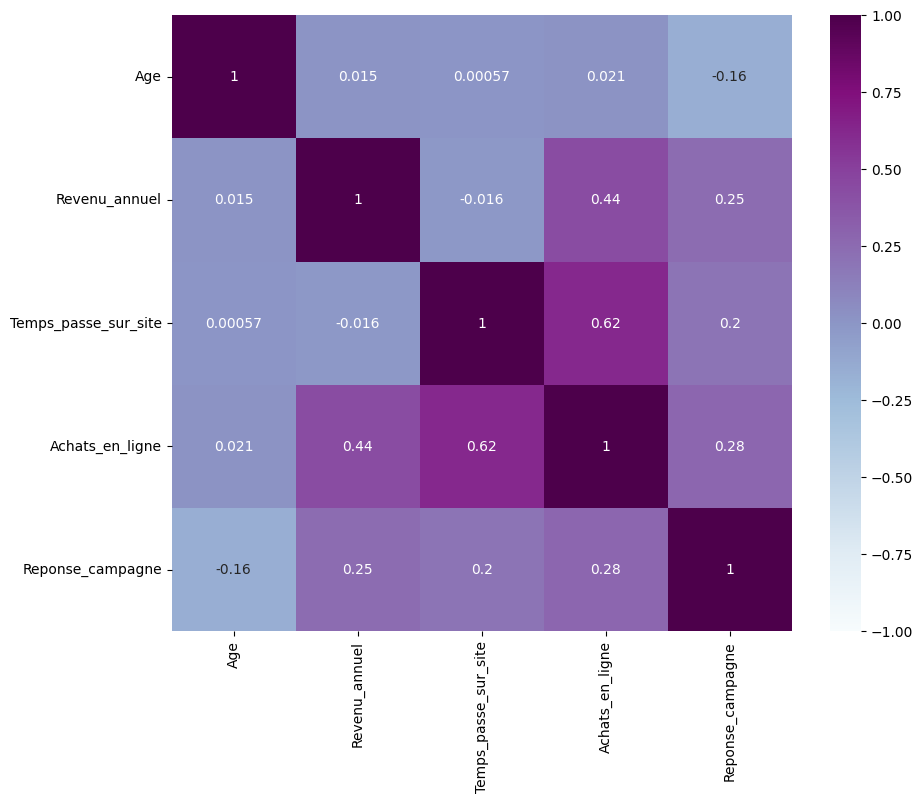

In [12]:
# EXPLORING THE CORRELATION BETWEEN ALL THE NUMERIC COLUMNS VIA HEATMAP
plt.figure(figsize = (10,8))
sns.heatmap(data=df.corr(numeric_only=True), vmin = -1, vmax = 1, annot = True, cmap = 'BuPu', linecolor= 'black')

The most significant factors related to online purchases are time spent on site and annual income. Marketing campaigns might be more effective with higher-income and more engaged (time-spending) users. Age appears to play a minor or indirect role.

## Data Visualisation

In [13]:
df.tail()

,Age,Sexe,Revenu_annuel,Temps_passe_sur_site,Achats_en_ligne,Reponse_campagne
2395,26,Homme,34373,31.567494,10,1
2396,37,Femme,36249,26.347662,10,1
2397,30,Femme,34293,18.275369,7,0
2398,35,Homme,29447,17.211780,6,1
2399,39,Femme,28028,32.826752,10,0


Reponse_campagne
1    0.52625
0    0.47375
Name: proportion, dtype: float64


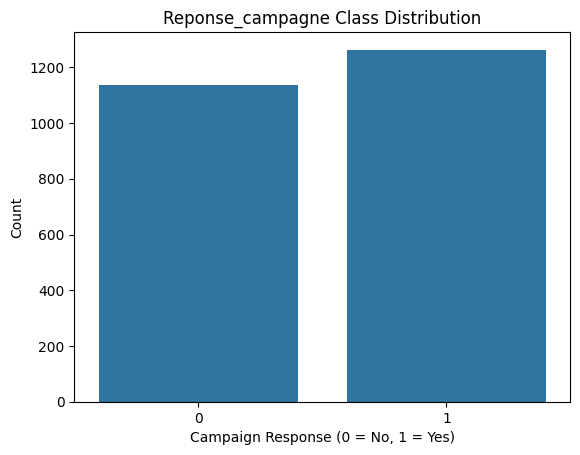

In [14]:
# Target Variable Analysis (Reponse_campagne)
# Check class balance for the target variable
print(df['Reponse_campagne'].value_counts(normalize=True))

# Plot the distribution
sns.countplot(x='Reponse_campagne', data=df)
plt.title('Reponse_campagne Class Distribution')
plt.xlabel('Campaign Response (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


The target variable represents whether a customer responded positively to a marketing campaign:

- **1** = Responded
- **0** = Did not respond

#### Class Distribution:
- **52.6%** of customers **responded positively** (Reponse_campagne = 1)
- **47.4%** **did not respond** (Reponse_campagne = 0)

This shows that the dataset is **fairly balanced**, meaning:

- We do **not** need to apply techniques like oversampling (SMOTE) or class weights.
- Common classification models will perform **reliably** without special treatment for imbalance.

#### Business Implication:
- A **significant portion of customers** are engaged, which is promising for predictive modeling.
- Our goal is to identify patterns in the data that distinguish responders from non-responders.

####  Modeling Insight:
- We will use **accuracy, precision, recall, and F1-score** to evaluate our models.
- Depending on business priorities:
  - If **cost of contacting uninterested customers** is high → focus on **precision**.
  - If **missing potential responders** is costly → focus on **recall**.

## Univariate Analysis of Customer Data

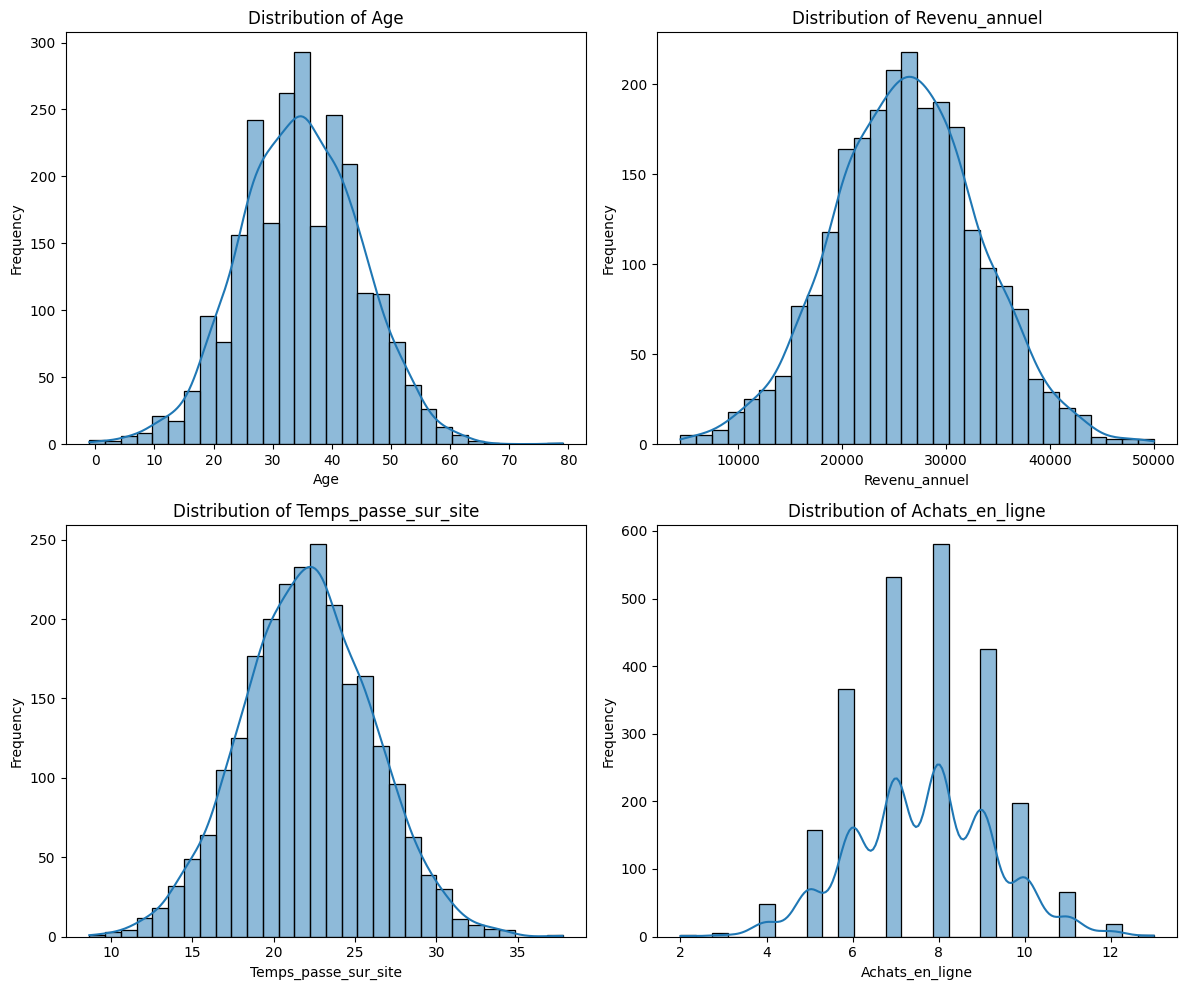

In [15]:

features = ['Age', 'Revenu_annuel', 'Temps_passe_sur_site', 'Achats_en_ligne']

# Plot histograms for numerical features
plt.figure(figsize=(12, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


### Boxplots to detect outliers visually

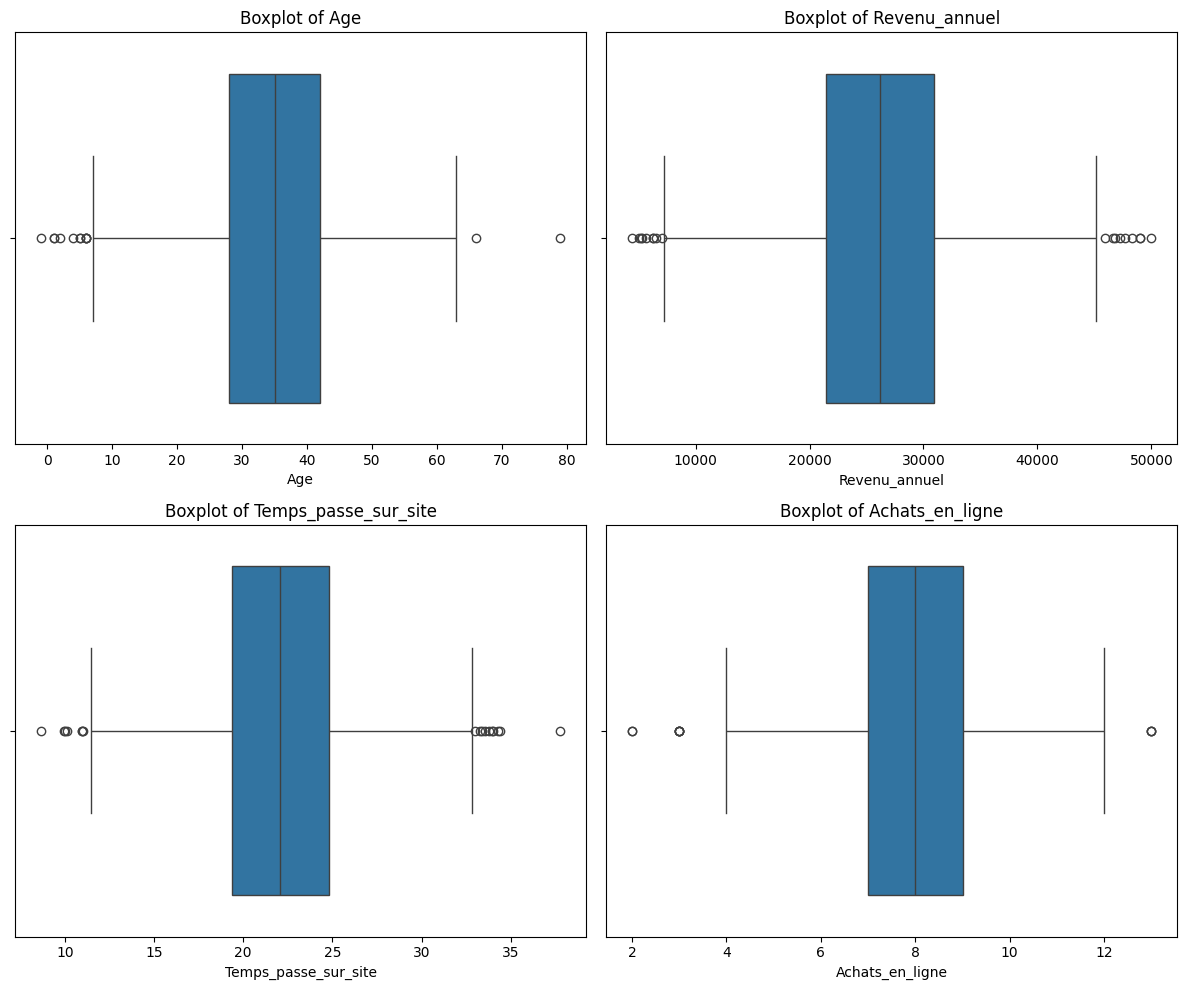

In [16]:
# Boxplots for Outlier Detection
plt.figure(figsize=(12, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()


The boxplots show outliers that could distort KNN model. Removing them improves model stability. Given the data shape and cleaned distribution, a logistic regression model would be a good starting point

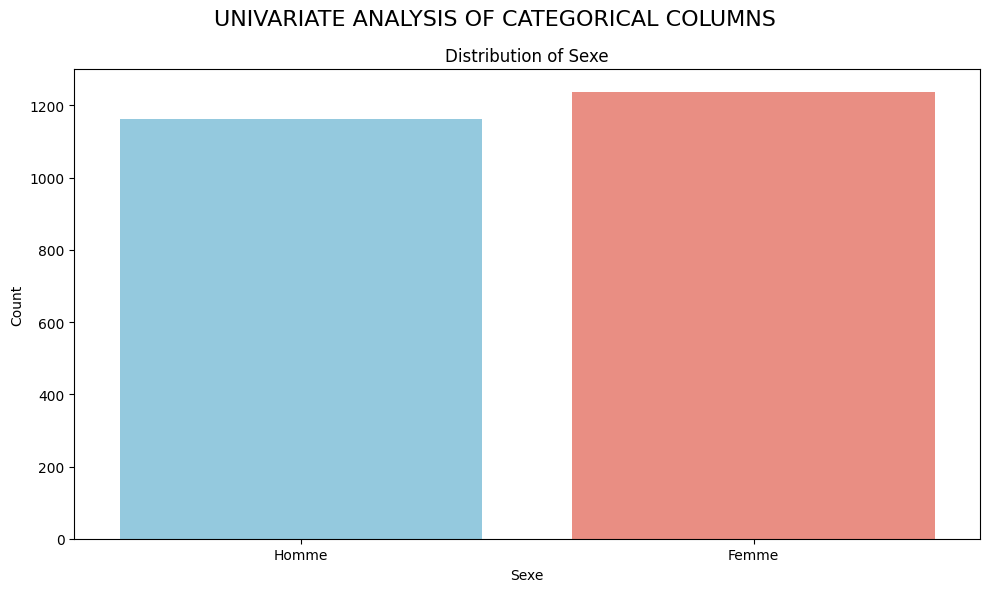

In [19]:
# Explore the categorical column by CountPlot
t = 1
plt.figure(figsize=(10, 6))
plt.suptitle('UNIVARIATE ANALYSIS OF CATEGORICAL COLUMNS', fontsize=16, color='black')

for i in cat_col:
    plt.subplot(1, len(cat_col), t)
    sns.countplot(data=data_cat, x=i, hue=i, palette=['skyblue', 'salmon'], legend=False)
    plt.title(f'Distribution of {i}')
    plt.xlabel(i)
    plt.ylabel("Count")
    plt.xticks(rotation=0)
    t += 1

plt.tight_layout()
plt.show()


Let's convert the other colunmns to categorial values so we can interpet these as well

In [30]:
# Create categorical groupings within df
df['Age_Group'] = pd.cut(df['Age'], 
                         bins=[15, 25, 35, 45, 55, 70], 
                         labels=['15-25', '26-35', '36-45', '46-55', '56-70'])

df['Income_Group'] = pd.cut(df['Revenu_annuel'], bins=5)  # Equal-width bins

df['Site_Time_Bracket'] = pd.qcut(df['Temps_passe_sur_site'], 
                                  q=4, 
                                  labels=['Low', 'Medium', 'High', 'Very High'])

df['Purchase_Level'] = pd.cut(df['Achats_en_ligne'], 
                              bins=[0, 4, 8, 12], 
                              labels=['Low', 'Medium', 'High'])


In [31]:
cat_cols = ['Sexe', 'Age_Group', 'Income_Group', 'Site_Time_Bracket', 'Purchase_Level']

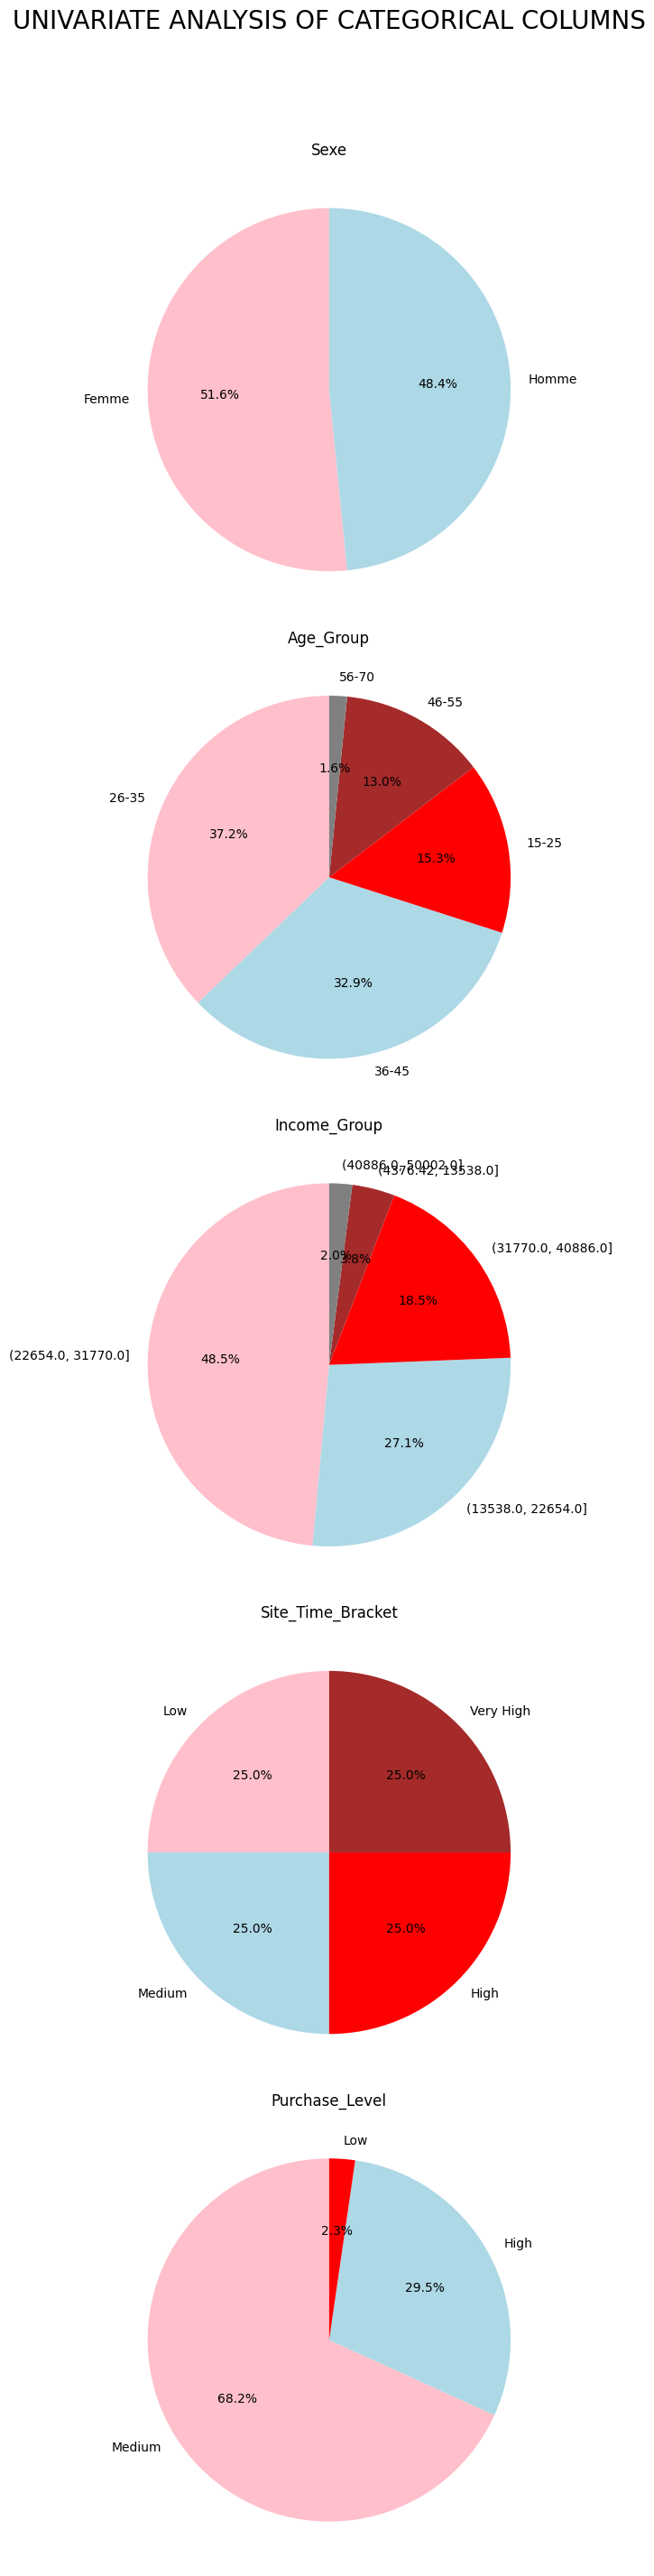

In [32]:
t = 1
plt.figure(figsize=(25, 30))
plt.suptitle('UNIVARIATE ANALYSIS OF CATEGORICAL COLUMNS', fontsize=20, color='Black')

for i in cat_cols:
    plt.subplot(len(cat_cols), 1, t)
    df[i].value_counts().plot.pie(
        autopct='%1.1f%%',
        startangle=90,
        colors=['pink', 'lightblue', 'red', 'brown', 'grey', 'yellow', 'green', 'orange', 'blue', 'gold']
    )
    plt.title(i)
    plt.ylabel('')
    t += 1

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Now that we have our categorical colums let's see how does Gender vary by Age Group?

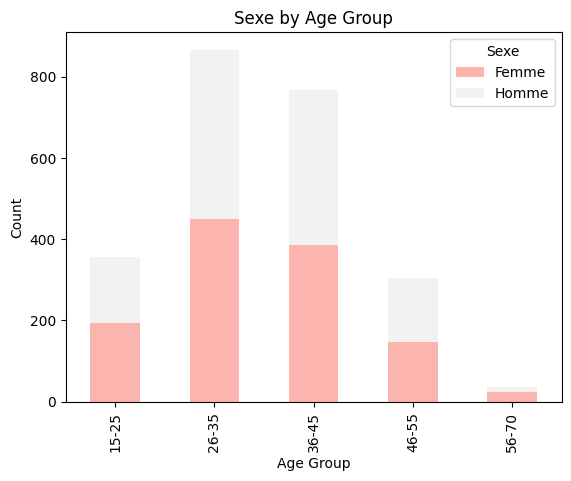

In [33]:
pd.crosstab(df['Age_Group'], df['Sexe']).plot(kind='bar', stacked=True, colormap='Pastel1')
plt.title('Sexe by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Sexe')
plt.show()


### Heatmap

this heatmap is done to compare Age Group vs Purchase level to see which Age Bracket spends most

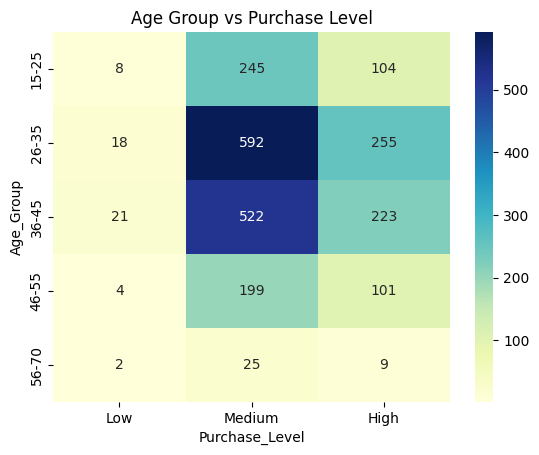

In [34]:
sns.heatmap(pd.crosstab(df['Age_Group'], df['Purchase_Level']), annot=True, fmt='d', cmap='YlGnBu')
plt.title('Age Group vs Purchase Level')
plt.show()

How does behavior shift across site engagement levels?
The prime purchasing age range is 26–45, particularly in the medium to high purchase levels.
Younger (15–25) and older (56–70) users are significantly less active in purchases.
This insight is valuable for targeted marketing, suggesting campaigns and promotions should primarily focus on the 26–45 demographic to maximize engagement and sales.

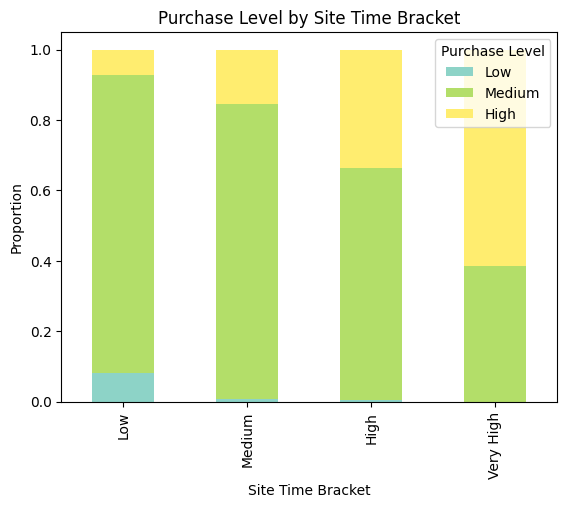

In [41]:
# Normalize the counts
normalized = pd.crosstab(df['Site_Time_Bracket'], df['Purchase_Level'], normalize='index')

normalized.plot(kind='bar', stacked=True, colormap='Set3')
plt.title('Purchase Level by Site Time Bracket')
plt.ylabel('Proportion')
plt.xlabel('Site Time Bracket')
plt.legend(title='Purchase Level')
plt.show()


This indicates that the Purchase Levels are high the longer a customer spends time on the Site

In [40]:
df.groupby('Age_Group')[['Achats_en_ligne', 'Temps_passe_sur_site', 'Revenu_annuel']].mean()

/var/folders/v6/475q_z_j4ds47grtp7s4xs2c0000gn/T/ipykernel_14069/1177485860.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Age_Group')[['Achats_en_ligne', 'Temps_passe_sur_site', 'Revenu_annuel']].mean()


,Achats_en_ligne,Temps_passe_sur_site,Revenu_annuel
Age_Group,,,
15-25,7.610644,22.085814,26005.361345
26-35,7.651270,21.966707,26507.256351
36-45,7.623207,22.202579,25999.116037
46-55,7.743421,22.026713,26383.108553
56-70,7.567568,21.914398,24784.594595


Let's compare some more but this time to our Target (Campaign Response)

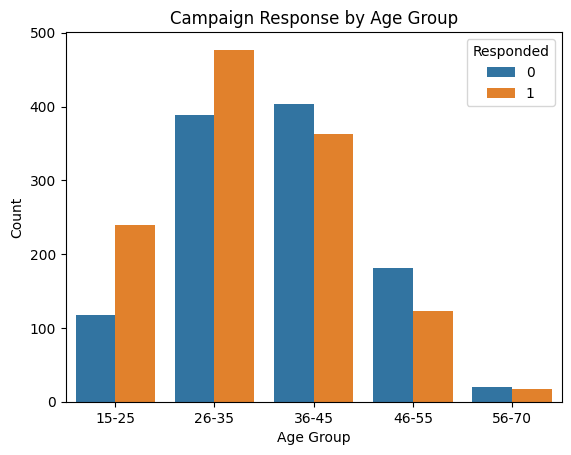

In [42]:
sns.countplot(data=df, x='Age_Group', hue='Reponse_campagne')
plt.title('Campaign Response by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Responded')
plt.show()

We have different Age Groups Responding to our Campaign we have a high count response count for the age groups 26-35 which indicates that "Younger" customers tend to react to our marketing campaign

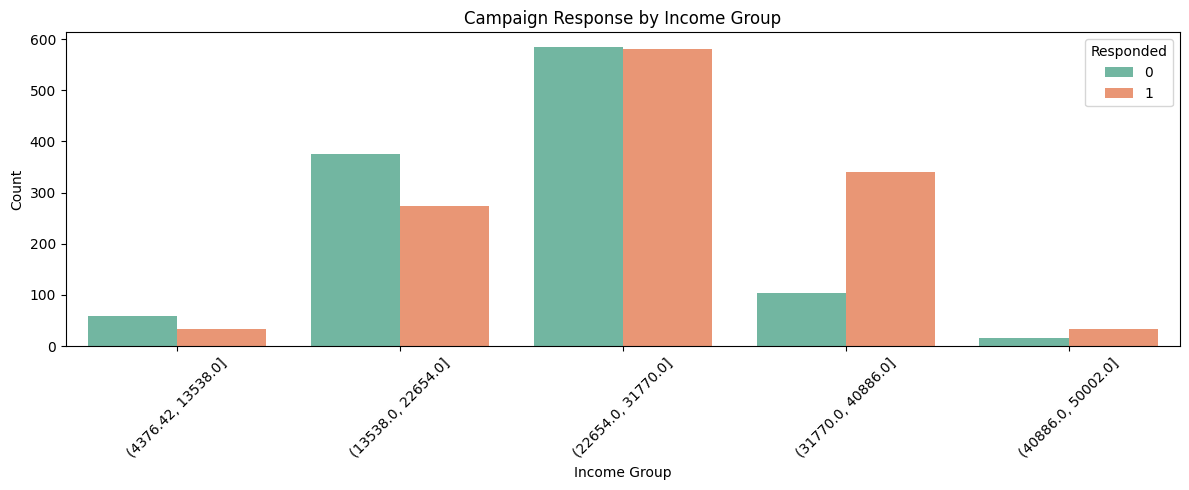

In [43]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='Income_Group', hue='Reponse_campagne', palette='Set2')
plt.title('Campaign Response by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Count')
plt.legend(title='Responded')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Campaign Response by Site Time Bracket: How long the customers spend on the Site vs if they Respond to the campaign or not

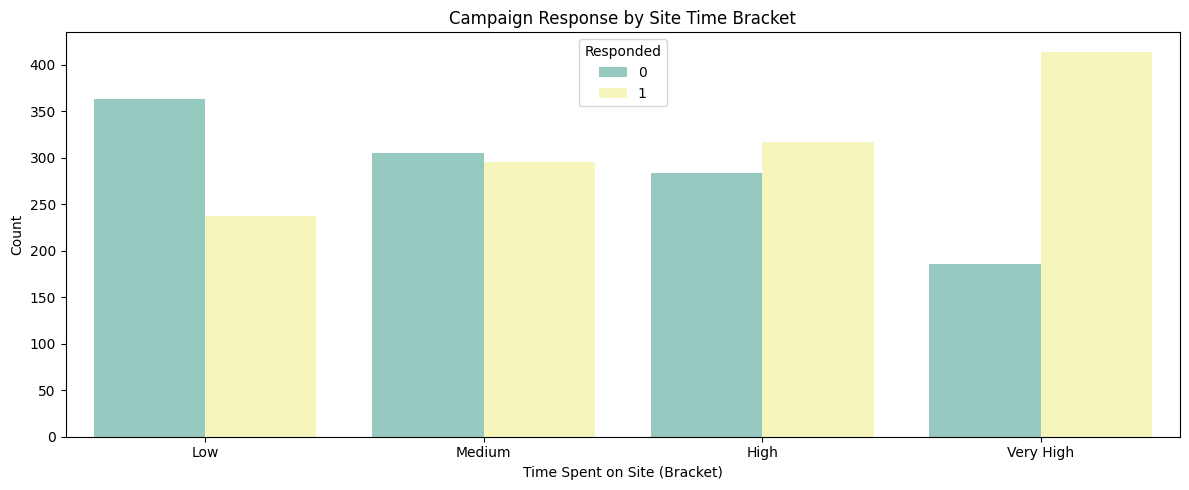

In [44]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='Site_Time_Bracket', hue='Reponse_campagne', palette='Set3')
plt.title('Campaign Response by Site Time Bracket')
plt.xlabel('Time Spent on Site (Bracket)')
plt.ylabel('Count')
plt.legend(title='Responded')
plt.tight_layout()
plt.show()


These results show that the longer a customer spends "High" "Very High" on the Site the most likely they will respond (positivly to our campaing) compared to "Low"

## Bivariate Analysis of Customer Data

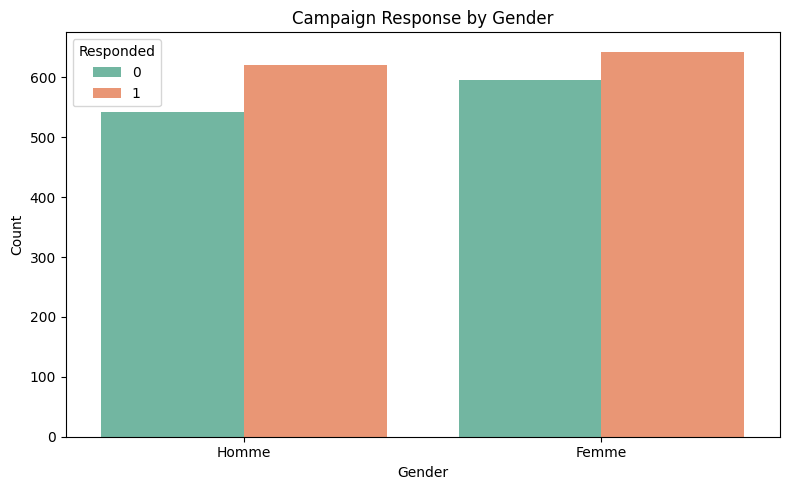

In [45]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Sexe', hue='Reponse_campagne', palette='Set2')
plt.title('Campaign Response by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Responded')
plt.tight_layout()
plt.show()


/var/folders/v6/475q_z_j4ds47grtp7s4xs2c0000gn/T/ipykernel_14069/2663587163.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Reponse_campagne', y='Revenu_annuel', palette='Set3')


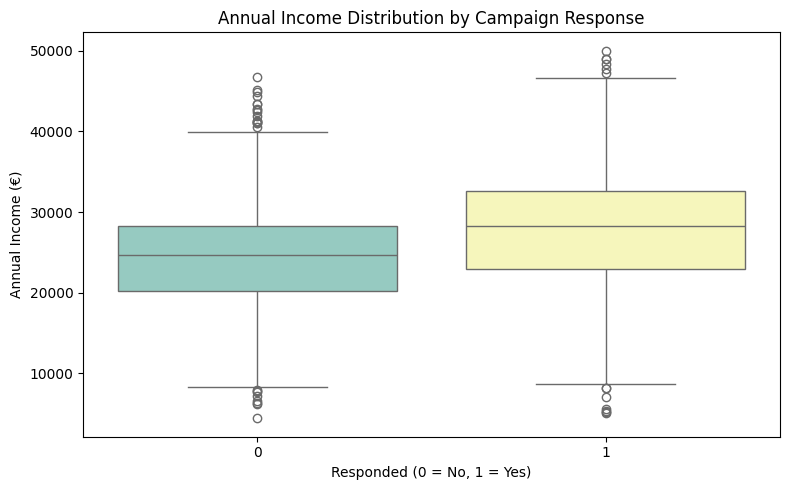

In [48]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Reponse_campagne', y='Revenu_annuel', palette='Set3')
plt.title('Annual Income Distribution by Campaign Response')
plt.xlabel('Responded (0 = No, 1 = Yes)')
plt.ylabel('Annual Income (€)')
plt.tight_layout()
plt.show()


Responders tend to have higher annual incomes than non-responders. The median income is visibly higher, with more high-income outliers. This suggests that the campaign is more effective with wealthier customers and future targeting should consider income segmentation.

## Feature Engineering and PCA

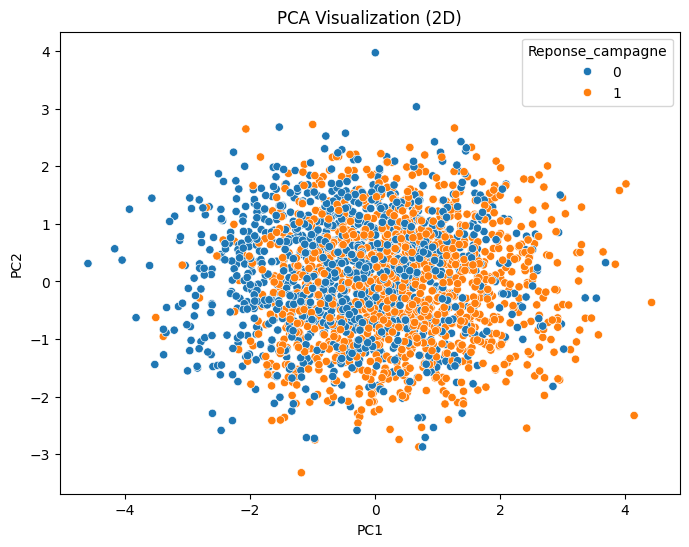

In [61]:

df_encoded = pd.get_dummies(df, columns=['Sexe'], drop_first=True)

# Drop binning columns (categorical labels not suitable for modeling directly)
df_encoded = df_encoded.drop(columns=['Age_Group', 'Income_Group', 'Site_Time_Bracket', 'Purchase_Level'])

# Define features and target
X = df_encoded.drop('Reponse_campagne', axis=1)
y = df_encoded['Reponse_campagne']

# Normalize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA visualization
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y)
plt.title("PCA Visualization (2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


## Train/test split

In [59]:
X = df_encoded.drop('Reponse_campagne', axis=1)
y = df_encoded['Reponse_campagne']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

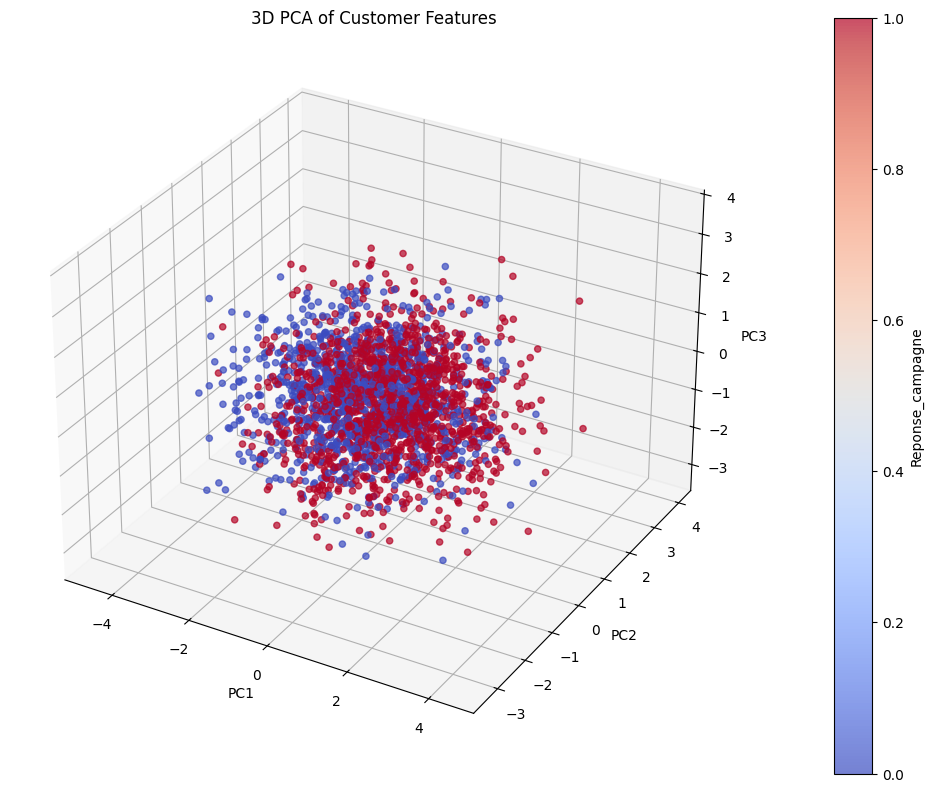

In [60]:
# 3D PCA Visualization

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



# 1. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Apply PCA to get 3 components
pca_3 = PCA(n_components=3, random_state=42)
X_pca3 = pca_3.fit_transform(X_scaled)

# 3. Plot in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X_pca3[:, 0], X_pca3[:, 1], X_pca3[:, 2],
    c=y, cmap='coolwarm', alpha=0.7
)

ax.set_title('3D PCA of Customer Features')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

cbar = plt.colorbar(scatter, pad=0.1)
cbar.set_label('Reponse_campagne')

plt.tight_layout()
plt.show()


## Modeling

In [52]:
def evaluate_model(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n--- {name} ---")
    print(classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


## Logistic Regression


--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.67      0.62      0.65       227
           1       0.68      0.73      0.70       253

    accuracy                           0.68       480
   macro avg       0.68      0.67      0.67       480
weighted avg       0.68      0.68      0.68       480



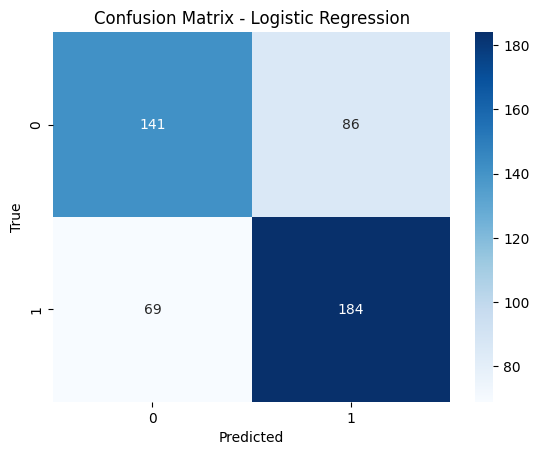

In [53]:
log_reg = LogisticRegression()
evaluate_model(log_reg, "Logistic Regression")

## KNN


--- KNN (best k = 9) ---
              precision    recall  f1-score   support

           0       0.65      0.59      0.61       227
           1       0.66      0.71      0.68       253

    accuracy                           0.65       480
   macro avg       0.65      0.65      0.65       480
weighted avg       0.65      0.65      0.65       480



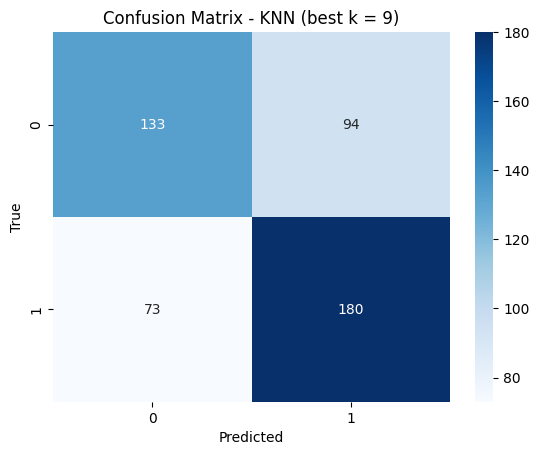

In [54]:
param_grid_knn = {'n_neighbors': range(3, 11)}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='f1')
grid_knn.fit(X_train, y_train)
best_k = grid_knn.best_params_['n_neighbors']
evaluate_model(grid_knn.best_estimator_, f"KNN (best k = {best_k})")


## Decision Tree


--- Decision Tree (best depth = 4) ---
              precision    recall  f1-score   support

           0       0.71      0.53      0.61       227
           1       0.66      0.81      0.73       253

    accuracy                           0.68       480
   macro avg       0.69      0.67      0.67       480
weighted avg       0.68      0.68      0.67       480



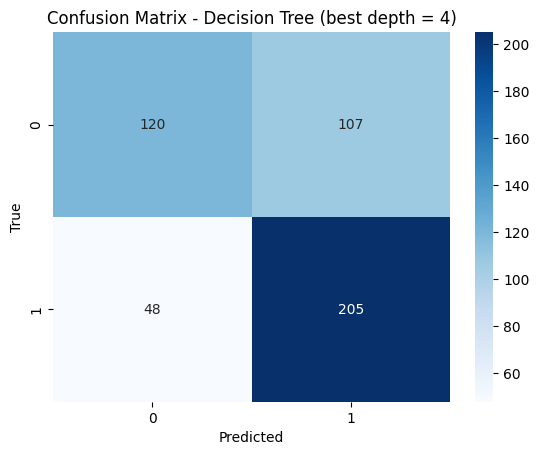

In [55]:
param_grid_tree = {'max_depth': range(3, 10)}
grid_tree = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_tree, cv=5, scoring='f1')
grid_tree.fit(X_train, y_train)
best_depth = grid_tree.best_params_['max_depth']
evaluate_model(grid_tree.best_estimator_, f"Decision Tree (best depth = {best_depth})")


## Random Forest


--- Random Forest ( max_depth=4) ---
              precision    recall  f1-score   support

           0       0.72      0.59      0.65       227
           1       0.68      0.79      0.73       253

    accuracy                           0.70       480
   macro avg       0.70      0.69      0.69       480
weighted avg       0.70      0.70      0.69       480



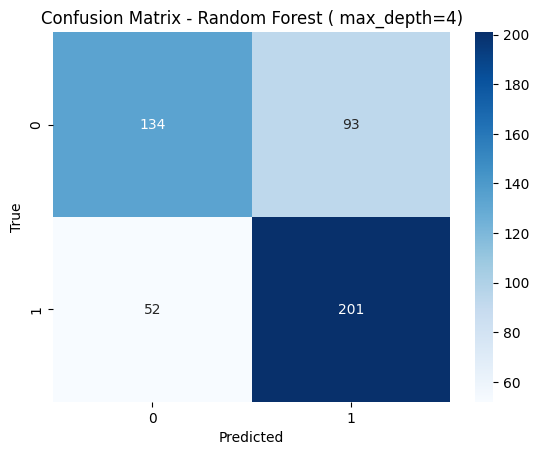

In [82]:
param_grid_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth':    range(3, 11)
}
grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    cv=5,
    scoring='f1',
    n_jobs=-1
)
grid_rf.fit(X_train, y_train)
best_n = grid_rf.best_params_['n_estimators']
best_depth = grid_rf.best_params_['max_depth']
evaluate_model(
    grid_rf.best_estimator_,
    f"Random Forest ( max_depth={best_depth})"
)

## Gradient Boosting


--- Gradient Boosting (max_depth=3) ---
              precision    recall  f1-score   support

           0       0.72      0.59      0.64       227
           1       0.68      0.79      0.73       253

    accuracy                           0.69       480
   macro avg       0.70      0.69      0.69       480
weighted avg       0.70      0.69      0.69       480



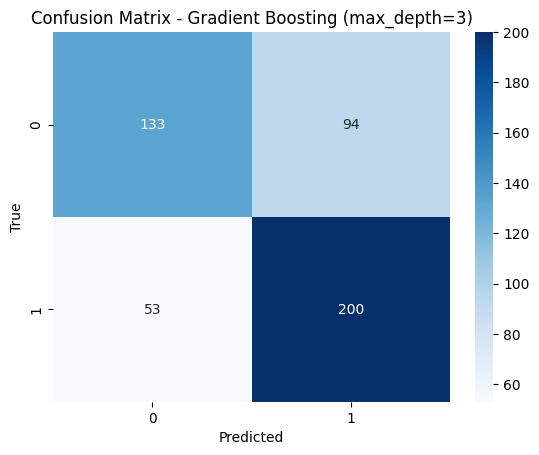

In [84]:
param_grid_gb = {
    'learning_rate': [0.01, 0.1],
    'n_estimators':  [100, 200],
    'max_depth':     [3, 5]
}
grid_gb = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_grid_gb,
    cv=5,
    scoring='f1',
    n_jobs=-1
)
grid_gb.fit(X_train, y_train)

best_lr    = grid_gb.best_params_['learning_rate']
best_n      = grid_gb.best_params_['n_estimators']
best_depth = grid_gb.best_params_['max_depth']

evaluate_model(
    grid_gb.best_estimator_,
    f"Gradient Boosting (max_depth={best_depth})"
)

## XGBoost


--- XGBoost (best max_depth = 3) ---
              precision    recall  f1-score   support

           0       0.65      0.58      0.61       227
           1       0.65      0.72      0.69       253

    accuracy                           0.65       480
   macro avg       0.65      0.65      0.65       480
weighted avg       0.65      0.65      0.65       480



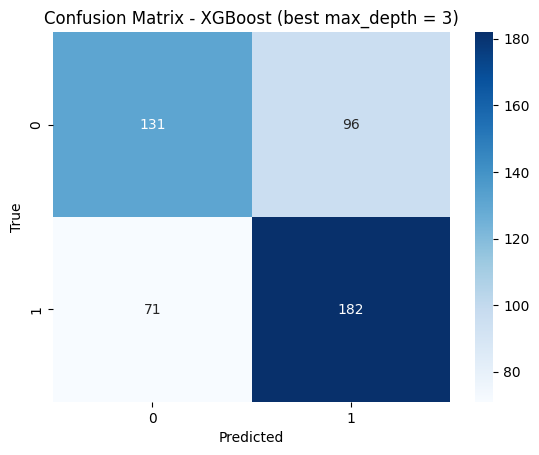

In [108]:
import warnings
# Ignore the specific XGBoost UserWarnings about unused parameters
warnings.filterwarnings('ignore', category=UserWarning, module='xgboost.core')

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Tune only max_depth for XGBoost
param_grid_xgb = {
    'max_depth': range(3, 11)
}
grid_xgb = GridSearchCV(
    XGBClassifier(
        random_state=42,
        eval_metric='logloss'   # no use_label_encoder parameter here
    ),
    param_grid_xgb,
    cv=5,
    scoring='f1',
    n_jobs=-1
)
grid_xgb.fit(X_train, y_train)

best_depth = grid_xgb.best_params_['max_depth']
evaluate_model(
    grid_xgb.best_estimator_,
    f"XGBoost (best max_depth = {best_depth})"
)


## Pipelines and ROC Curves

In [83]:
# — 1) Define pipelines —
pipe_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('pca',    PCA()),
    ('clf',    RandomForestClassifier(random_state=42))
])
pipe_gb = Pipeline([
    ('scaler', StandardScaler()),
    ('pca',    PCA()),
    ('clf',    GradientBoostingClassifier(random_state=42))
])
pipe_svc = Pipeline([
    ('scaler', StandardScaler()),
    ('pca',    PCA()),
    ('clf',    SVC(probability=True, random_state=42))
])

# — 2) Hyperparameter grids —
param_grid_rf = {
    'pca__n_components':   [0.90, 0.95, 0.99],
    'clf__n_estimators':   [100, 200],
    'clf__max_depth':      [None, 10, 20],
    'clf__min_samples_split': [2, 5]
}
param_grid_gb = {
    'pca__n_components': [0.90, 0.95],
    'clf__learning_rate': [0.01, 0.1],
    'clf__n_estimators':  [100, 200],
    'clf__max_depth':     [3, 5]
}
param_grid_svc = {
    'pca__n_components': [0.90, 0.95],
    'clf__C':            [0.1, 1, 10],
    'clf__gamma':        ['scale', 0.01, 0.1]
}

# — 3) Create & fit GridSearchCV objects —
gs_rf = GridSearchCV(pipe_rf,  param_grid_rf,  cv=5, scoring='f1', n_jobs=-1)
gs_gb = GridSearchCV(pipe_gb,  param_grid_gb,  cv=5, scoring='f1', n_jobs=-1)
gs_svc = GridSearchCV(pipe_svc, param_grid_svc, cv=5, scoring='f1', n_jobs=-1)

gs_rf.fit(X_train, y_train)
gs_gb.fit(X_train, y_train)
gs_svc.fit(X_train, y_train)

print("RF best params:",  gs_rf.best_params_)
print("GB best params:",  gs_gb.best_params_)
print("SVC best params:", gs_svc.best_params_)

RF best params: {'clf__max_depth': 10, 'clf__min_samples_split': 2, 'clf__n_estimators': 100, 'pca__n_components': 0.99}
GB best params: {'clf__learning_rate': 0.01, 'clf__max_depth': 3, 'clf__n_estimators': 100, 'pca__n_components': 0.9}
SVC best params: {'clf__C': 10, 'clf__gamma': 0.01, 'pca__n_components': 0.9}



=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.67      0.62      0.65       227
           1       0.68      0.73      0.70       253

    accuracy                           0.68       480
   macro avg       0.68      0.67      0.67       480
weighted avg       0.68      0.68      0.68       480

Confusion Matrix:
 [[141  86]
 [ 69 184]]
Cohen Kappa Score: 0.3497640272679602


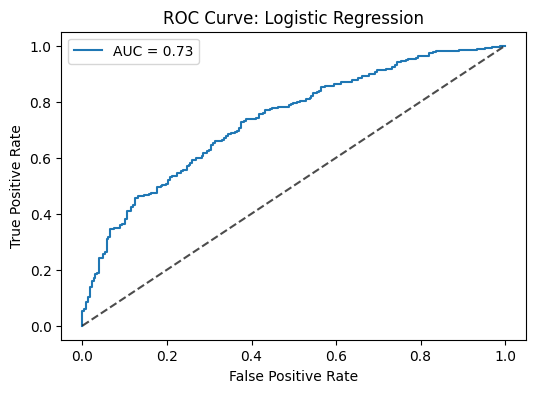


=== KNN ===
              precision    recall  f1-score   support

           0       0.65      0.59      0.62       227
           1       0.66      0.72      0.69       253

    accuracy                           0.65       480
   macro avg       0.65      0.65      0.65       480
weighted avg       0.65      0.65      0.65       480

Confusion Matrix:
 [[133  94]
 [ 72 181]]
Cohen Kappa Score: 0.3028261440195993


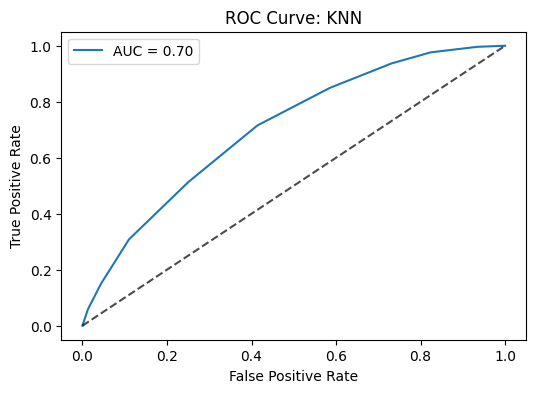


=== Decision Tree ===
              precision    recall  f1-score   support

           0       0.66      0.59      0.62       227
           1       0.67      0.73      0.70       253

    accuracy                           0.66       480
   macro avg       0.66      0.66      0.66       480
weighted avg       0.66      0.66      0.66       480

Confusion Matrix:
 [[134  93]
 [ 68 185]]
Cohen Kappa Score: 0.32336356950232903


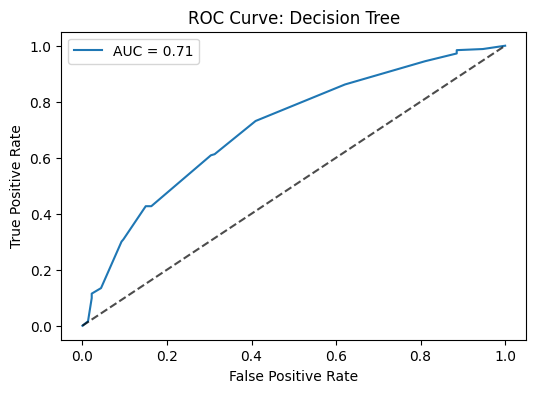


=== Random Forest ===
              precision    recall  f1-score   support

           0       0.66      0.58      0.62       227
           1       0.66      0.73      0.69       253

    accuracy                           0.66       480
   macro avg       0.66      0.66      0.66       480
weighted avg       0.66      0.66      0.66       480

Confusion Matrix:
 [[132  95]
 [ 68 185]]
Cohen Kappa Score: 0.31464611072179394


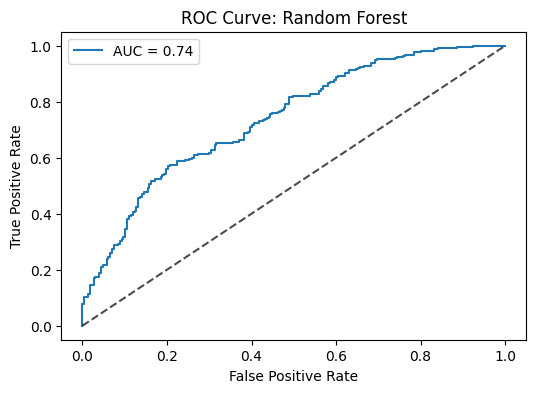


=== Gradient Boosting ===
              precision    recall  f1-score   support

           0       0.72      0.55      0.62       227
           1       0.67      0.81      0.73       253

    accuracy                           0.69       480
   macro avg       0.70      0.68      0.68       480
weighted avg       0.69      0.69      0.68       480

Confusion Matrix:
 [[125 102]
 [ 48 205]]
Cohen Kappa Score: 0.3654039380211179


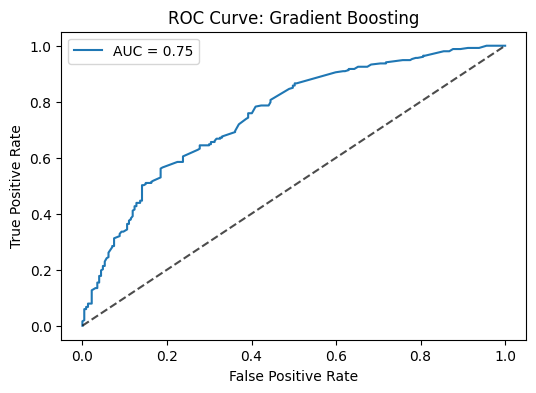


=== XGBoost ===
              precision    recall  f1-score   support

           0       0.65      0.58      0.61       227
           1       0.65      0.72      0.69       253

    accuracy                           0.65       480
   macro avg       0.65      0.65      0.65       480
weighted avg       0.65      0.65      0.65       480

Confusion Matrix:
 [[131  96]
 [ 71 182]]
Cohen Kappa Score: 0.2981473050117326


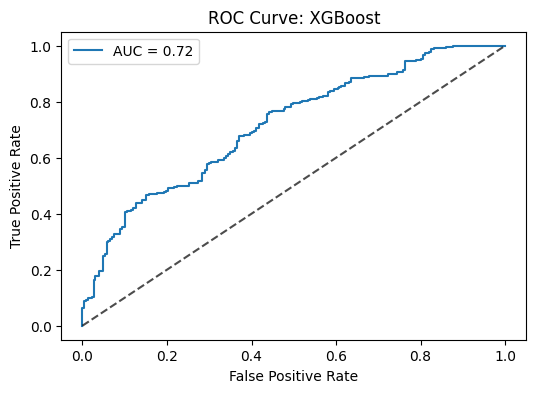

,Model,Accuracy,Precision,Recall,F1 Score,Kappa Score,Confusion Matrix
0,Logistic Regression,0.677083,0.681481,0.727273,0.703633,0.349764,"[[141, 86], [69, 184]]"
1,KNN,0.654167,0.658182,0.715415,0.685606,0.302826,"[[133, 94], [72, 181]]"
2,Decision Tree,0.664583,0.665468,0.731225,0.696798,0.323364,"[[134, 93], [68, 185]]"
3,Random Forest,0.660417,0.660714,0.731225,0.694184,0.314646,"[[132, 95], [68, 185]]"
4,Gradient Boosting,0.687500,0.667752,0.810277,0.732143,0.365404,"[[125, 102], [48, 205]]"
5,XGBoost,0.652083,0.654676,0.719368,0.685499,0.298147,"[[131, 96], [71, 182]]"


In [109]:
# 1) Tune XGBoost (only max_depth)
param_grid_xgb = {'max_depth': range(3, 11)}
grid_xgb = GridSearchCV(
    XGBClassifier(random_state=42, eval_metric='logloss'),
    param_grid_xgb,
    cv=5,
    scoring='f1',
    n_jobs=-1
)
grid_xgb.fit(X_train, y_train)
best_xgb = grid_xgb.best_estimator_

# 2) Reset tracking lists
m, acc, pre, rec, f1, kp, cf = [], [], [], [], [], [], []

# 3) model_val helper (unchanged)
def model_val(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)[:, 1]
    y_pred = (y_prob > 0.5).astype(int)

    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Cohen Kappa Score:", cohen_kappa_score(y_test, y_pred))

    plt.figure(figsize=(6, 4))
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_prob):.2f}')
    plt.plot([0, 1], [0, 1], 'k--', alpha=0.7)
    plt.title(f"ROC Curve: {name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

    if input(f"Save {name}? (y/n): ").strip().lower() == 'y':
        m.append(name)
        acc.append(accuracy_score(y_test, y_pred))
        pre.append(precision_score(y_test, y_pred))
        rec.append(recall_score(y_test, y_pred))
        f1.append(f1_score(y_test, y_pred))
        kp.append(cohen_kappa_score(y_test, y_pred))
        cf.append(confusion_matrix(y_test, y_pred))

# 4) Define models dict with XGBoost replacing SVM
models = {
    'Logistic Regression': gs_lr,
    'KNN':                  gs_knn,
    'Decision Tree':        gs_dt,
    'Random Forest':        gs_rf,
    'Gradient Boosting':    gs_gb,
    'XGBoost':              best_xgb
}

# 5) Run the evaluation loop
for name, clf in models.items():
    model_val(name, clf, X_train, y_train, X_test, y_test)

# 6) Build & display summary
Scoreline = pd.DataFrame({
    'Model':            m,
    'Accuracy':         acc,
    'Precision':        pre,
    'Recall':           rec,
    'F1 Score':         f1,
    'Kappa Score':      kp,
    'Confusion Matrix': cf
})
display(Scoreline)


## Evaluation

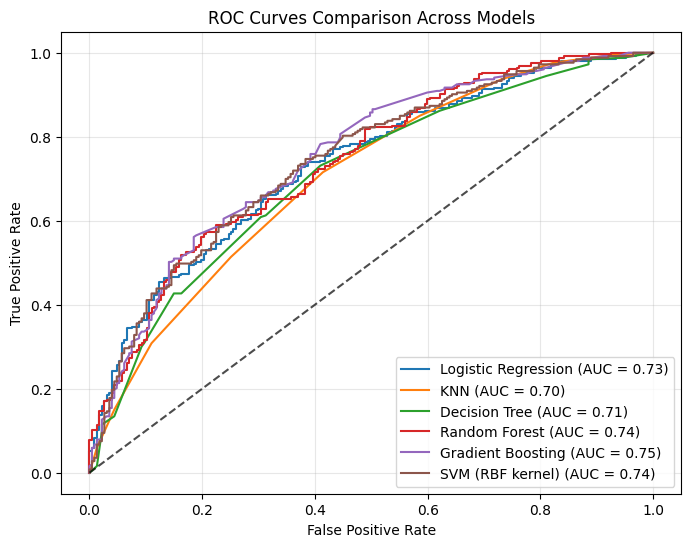

In [80]:
models = [
    ('Logistic Regression', gs_lr),
    ('KNN',                  gs_knn),
    ('Decision Tree',        gs_dt),
    ('Random Forest',        gs_rf),
    ('Gradient Boosting',    gs_gb),
    ('SVM (RBF kernel)',     gs_svc)
]

plt.figure(figsize=(8, 6))
for name, model in models:
    # Get probability scores or decision function
    if hasattr(model, 'predict_proba'):
        y_score = model.predict_proba(X_test)[:, 1]
    else:
        y_score = model.decision_function(X_test)
    
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    
    # Plot
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Diagonal luck line
plt.plot([0, 1], [0, 1], 'k--', alpha=0.7)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison Across Models')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()


## Heatmap Model comparison

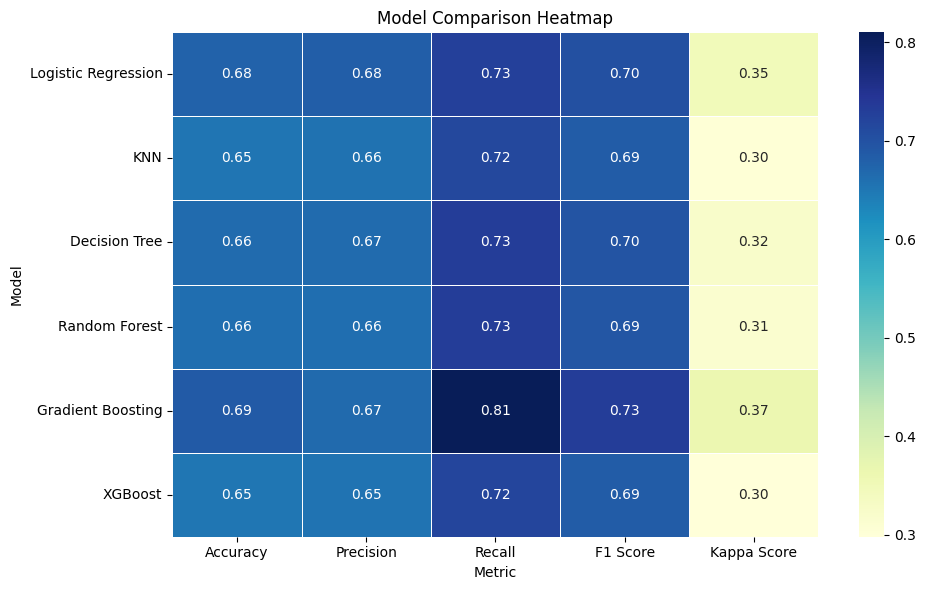

In [110]:
# 1. Pivot so that models are rows and metrics are columns
metrics_df = Scoreline.set_index('Model')[[
    'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Kappa Score'
]]

# 2. Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    metrics_df,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cmap="YlGnBu"
)
plt.title("Model Comparison Heatmap")
plt.ylabel("Model")
plt.xlabel("Metric")
plt.tight_layout()
plt.show()

We can see from our heatmap that the Gradient Boosting model leads across all key metrics:

Accuracy: 0.69
Precision: 0.67
Recall: 0.81
F1-score: 0.73
Cohen’s κ: 0.37
That exceptional recall, combined with solid precision, gives Gradient Boosting the highest F1 and κ. So for our marketing-response prediction, we’ll go with the Gradient Boosting classifier as our champion model.

## Business Interpretation

Our Gradient Boosting model correctly flags 81% of true responders while ensuring that 67% of the people we target actually respond, yielding an overall F1 score of 0.73 and 69% accuracy. In business terms, this means we can capture the vast majority of buyers with roughly one “wasted” contact for every two successful ones—dramatically cutting campaign costs and boosting ROI by focusing our resources on the highest‐propensity customers.

## Key Takeaways

- **Gradient Boosting Wins, But All Models Plateaued**  
  Our best F1 peaked at ~0.73 and accuracy stayed below 0.70, indicating the current features only capture limited predictive signal.

- **High Recall vs. Precision Trade-Offs**  
  We can identify ~80% of true responders (high recall) but still “waste” contacts on ~33% non-responders (precision ~67%), which limits cost savings.

- **Data Limitations Are the Bottleneck**  
  - **Feature Sparsity:** Only basic demographics and purchase history are available, missing key behavioural or engagement signals.  
  - **Low Signal-to-Noise:** Weak correlations between inputs and response make it hard for even complex models to find robust patterns.  
  - **Sample Size & Class Balance:** If responders are under-represented or the overall sample is small, models can overfit noise rather than learn generalizable rules.

## Why Performance Is Modest

Even the most sophisticated algorithms can only extract as much information as exists in the data. To boost performance, we should:

1. **Enrich the Data**  
   Incorporate additional signals—past campaign clicks/emails opened, web-browsing behaviour, product preferences, or third-party demographics.

2. **Engineer Stronger Features**  
   Create interaction terms (e.g. age × income), recency/frequency metrics, or behavioural segments to highlight patterns hidden in raw columns.

3. **Increase & Balance Your Sample**  
   Gather more observations—especially of responders—to give models enough varied examples and reduce overfitting on noise.
